In [1]:
#import all the useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [20]:
# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

In [21]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [22]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


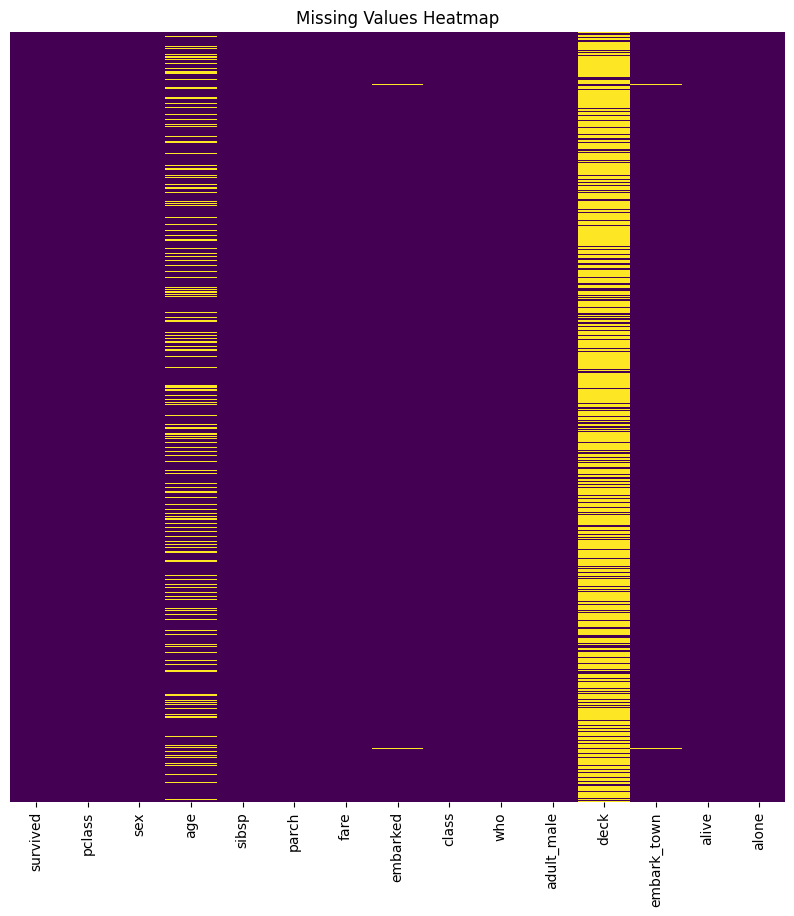

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False, cmap='viridis',yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [26]:
# Fill missing values for 'age'
df['age'] = df['age'].fillna(df['age'].mean())

In [31]:
# Using fillna to fill the missing categorical data using mode
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])

In [32]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


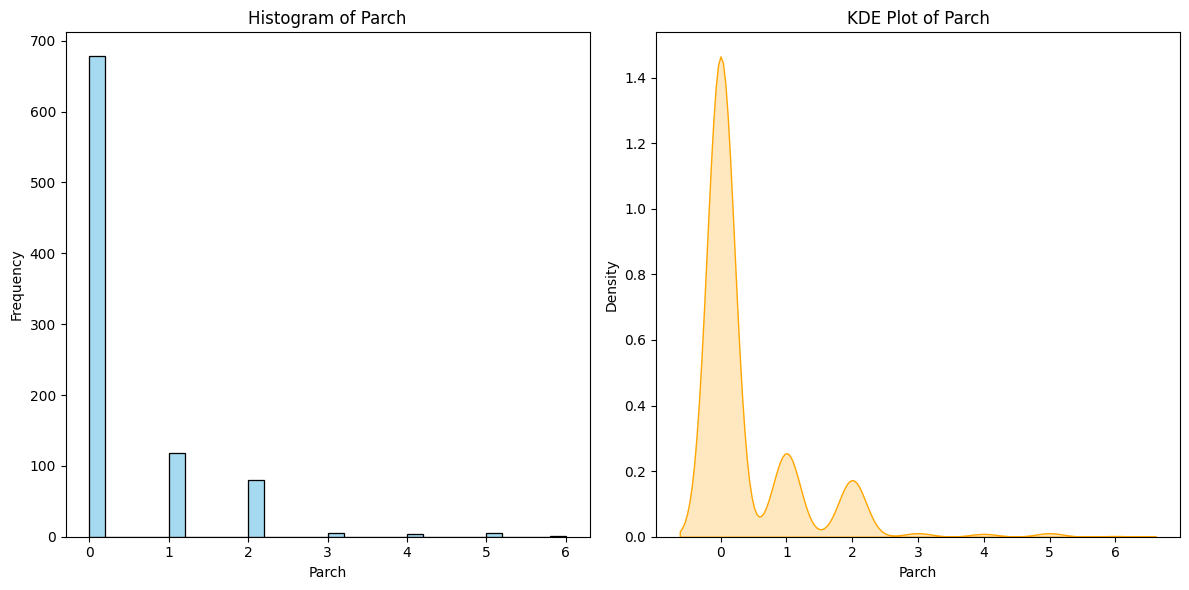

In [37]:
# Transforming the distribution of non-numeric features
# Investigating the distribution of parch features

plt.figure(figsize=(12,6))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df['parch'], bins=30, kde=False, color='skyblue')
plt.title('Histogram of Parch')
plt.xlabel('Parch')
plt.ylabel('Frequency')

# KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df['parch'], fill=True, color='orange')
plt.title('KDE Plot of Parch')
plt.xlabel('Parch')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

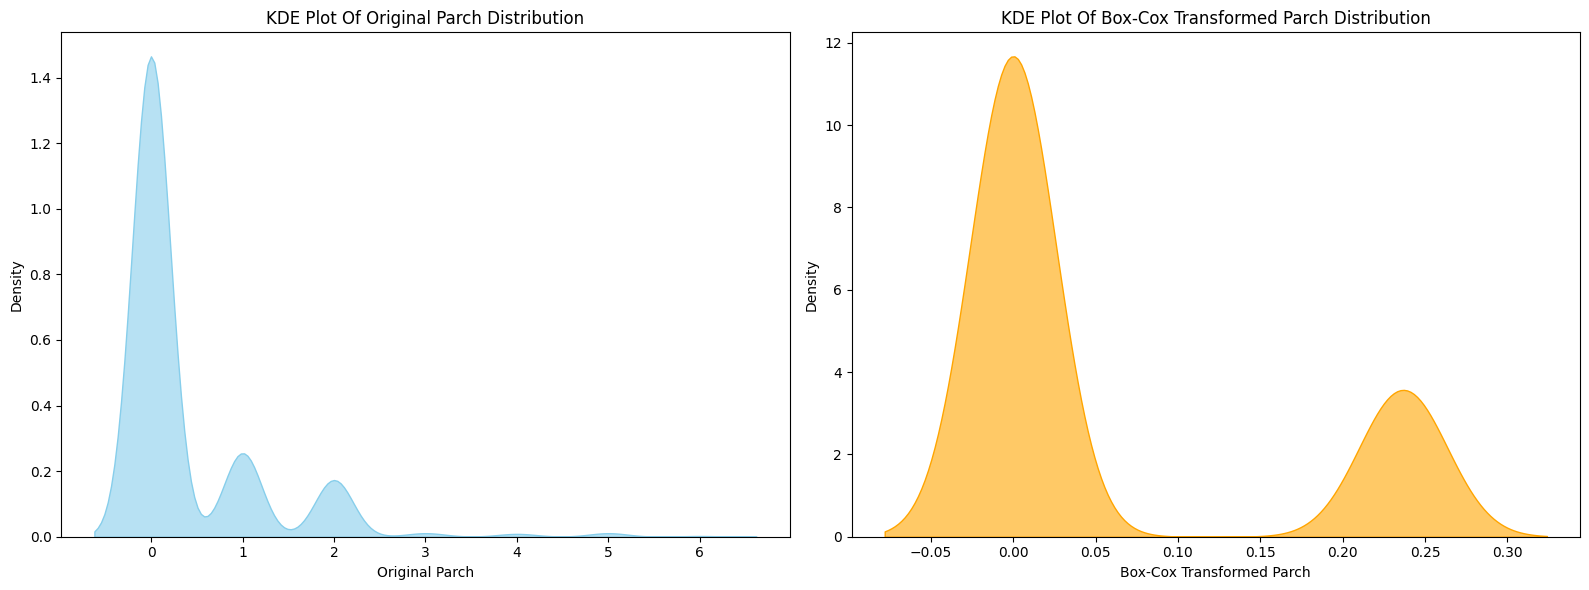

In [40]:
# from scipy import stats # incase you haven’t installed stats before
# Apply Box-Cox Transformation
# Box-Cox requires positive data, so we ensure 'parch' is > 0
# Since 'parch' is count data, we add a small constant

df['parch_shifted'] = df['parch'] + 1
df['parch_boxcox'], _=stats.boxcox(df['parch_shifted'])

# step 3: visualize the distributions using KDE
plt.figure(figsize=(16,6))

# KDE plot for original parch
plt.subplot(1,2,1)
sns.kdeplot(df['parch'], fill=True, color='skyblue', alpha=0.6)
plt.title('KDE Plot Of Original Parch Distribution')
plt.xlabel('Original Parch')
plt.ylabel('Density')

# KDE plot for Box-Cox transformed parch
plt.subplot(1,2,2)
sns.kdeplot(df['parch_boxcox'], fill=True, color='orange', alpha=0.6)
plt.title('KDE Plot Of Box-Cox Transformed Parch Distribution')
plt.xlabel('Box-Cox Transformed Parch')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

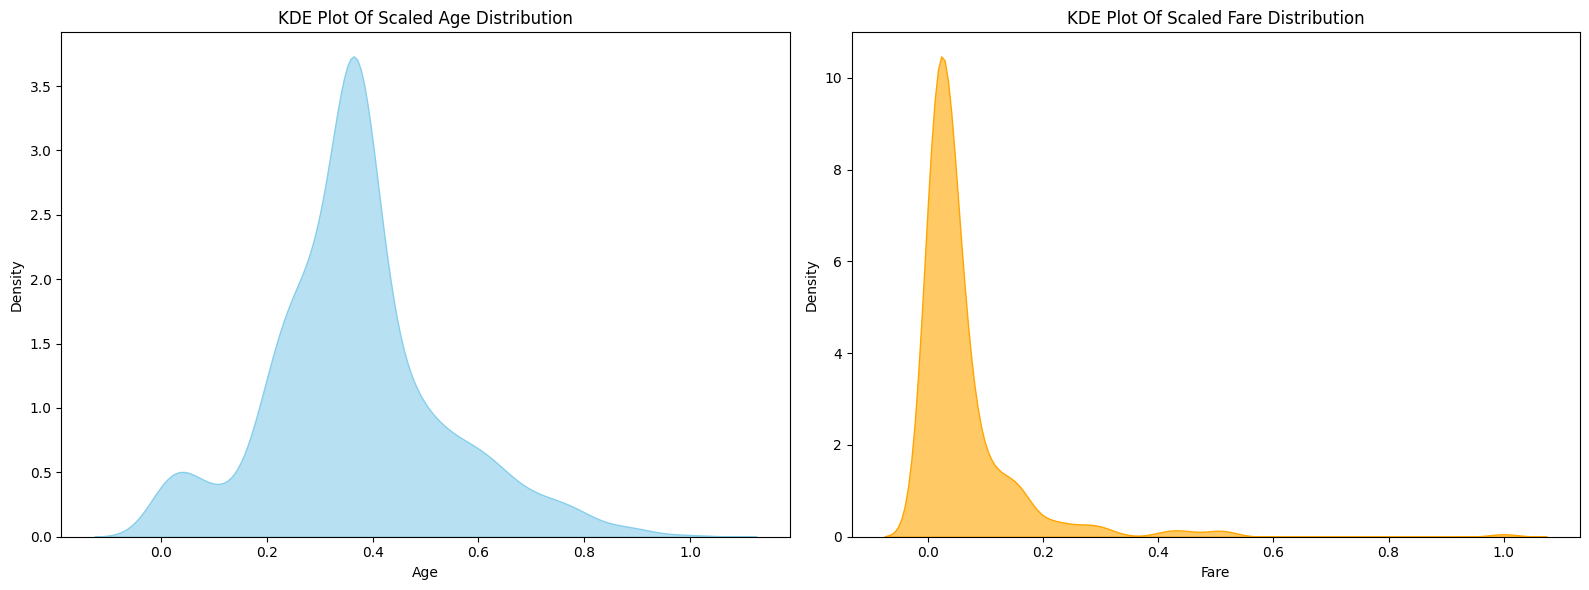

In [43]:
# Using the Min-Max Scaler() to transform Age and Fare (float types) into the range [0,1]
scaler = MinMaxScaler()

# Apply Min-Max Scalling to 'age' and 'fare'
df[['age_scaled', 'fare_scaled']] = scaler.fit_transform(df[['age', 'fare']])

# step 3: visualize the distributions using KDE
plt.figure(figsize=(16,6))

# KDE plot for scaled age
plt.subplot(1,2,1)
sns.kdeplot(df['age_scaled'], fill=True, color='skyblue', alpha=0.6)
plt.title('KDE Plot Of Scaled Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')

# KDE plot for scaled fare
plt.subplot(1,2,2)
sns.kdeplot(df['fare_scaled'], fill=True, color='orange', alpha=0.6)
plt.title('KDE Plot Of Scaled Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

**Data Enrichment**

In [46]:
# Creating Family Size
df['family_size'] = df['sibsp'] + df['parch'] + 1
# +1 to inclide the passenger as well
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,deck,embark_town,alive,alone,parch_shifted,parch_boxcox,age_scaled,fare_scaled,family_size,Is_Not_Alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,C,Southampton,no,False,1,0.0,0.271174,0.014151,2,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,C,Cherbourg,yes,False,1,0.0,0.472229,0.139136,2,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,C,Southampton,yes,True,1,0.0,0.321438,0.015469,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,C,Southampton,yes,False,1,0.0,0.434531,0.103644,2,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,C,Southampton,no,True,1,0.0,0.434531,0.015713,1,0


In [47]:
# Creating Is_Not_Alone
df['Is_Not_Alone'] = ((df['sibsp']>0) | (df['parch']>0)).astype(int)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,deck,embark_town,alive,alone,parch_shifted,parch_boxcox,age_scaled,fare_scaled,family_size,Is_Not_Alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,C,Southampton,no,False,1,0.0,0.271174,0.014151,2,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,C,Cherbourg,yes,False,1,0.0,0.472229,0.139136,2,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,C,Southampton,yes,True,1,0.0,0.321438,0.015469,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,C,Southampton,yes,False,1,0.0,0.434531,0.103644,2,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,C,Southampton,no,True,1,0.0,0.434531,0.015713,1,0


**Outlier** **Detection**

ValueError: num must be an integer with 1 <= num <= 4, not 5

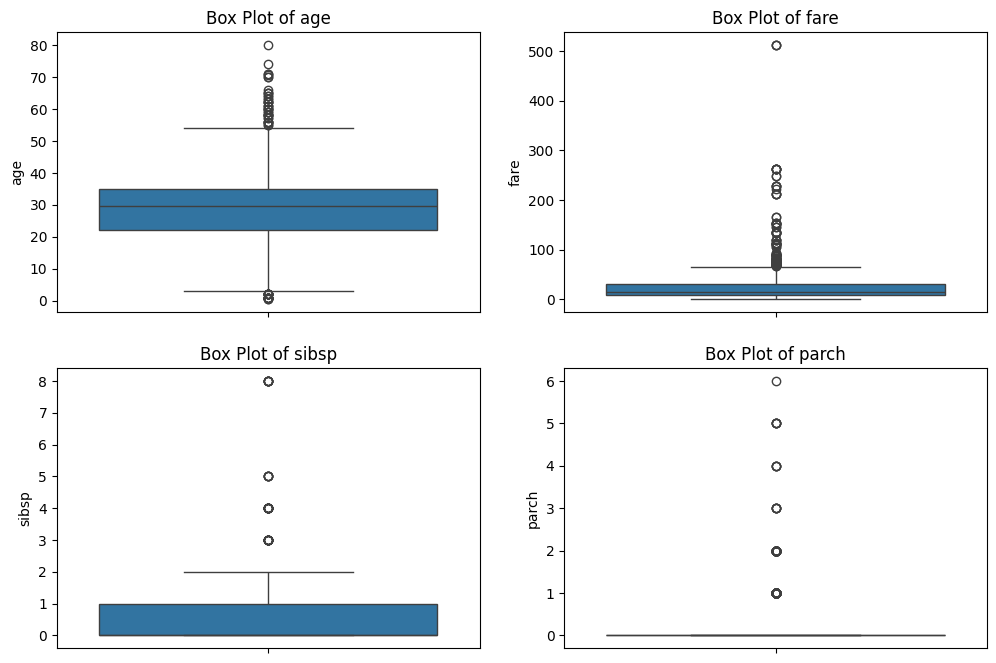

In [48]:
numerical_features = ['age', 'fare', 'sibsp', 'parch', 'family_size']

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical feature
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)

# Calculate the Interquartile Range (IQR) for each numerical feature
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in each numerical feature
outliers = (df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)

# --- Visualization: Box Plots ---
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()